# Neural Network - Forest Fires Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("forestfires.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
month            517 non-null object
day              517 non-null object
FFMC             517 non-null float64
DMC              517 non-null float64
DC               517 non-null float64
ISI              517 non-null float64
temp             517 non-null float64
RH               517 non-null int64
wind             517 non-null float64
rain             517 non-null float64
area             517 non-null float64
dayfri           517 non-null int64
daymon           517 non-null int64
daysat           517 non-null int64
daysun           517 non-null int64
daythu           517 non-null int64
daytue           517 non-null int64
daywed           517 non-null int64
monthapr         517 non-null int64
monthaug         517 non-null int64
monthdec         517 non-null int64
monthfeb         517 non-null int64
monthjan         517 non-null int64
monthjul         517 non-null int64
monthjun     

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [5]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

#### There are only two categories of size i.e. small and large

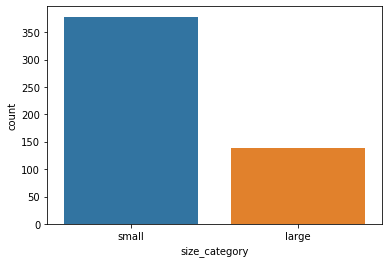

In [14]:
sns.countplot(x='size_category',data=df)

Dataset output variables seems to be imbalanced.

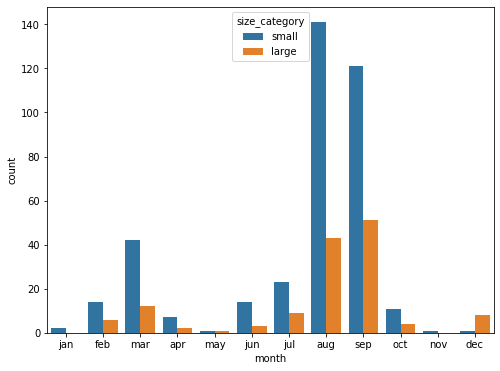

In [10]:
order_mon = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
plt.figure(figsize=(8,6))
sns.countplot(x='month',data=df,hue='size_category',order=order_mon);

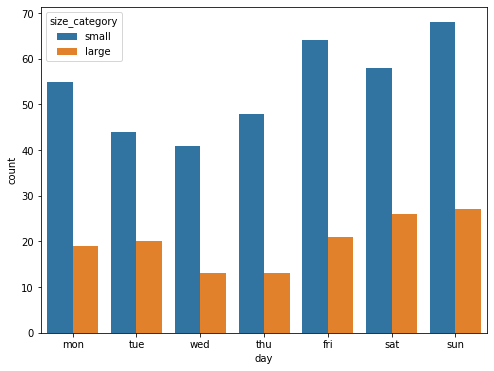

In [13]:
order_day = ['mon','tue','wed','thu','fri','sat','sun']
plt.figure(figsize=(8,6))
sns.countplot(x='day',data=df,hue='size_category',order=order_day);

Distribution accross days of week is bit similar/normal compared to months.

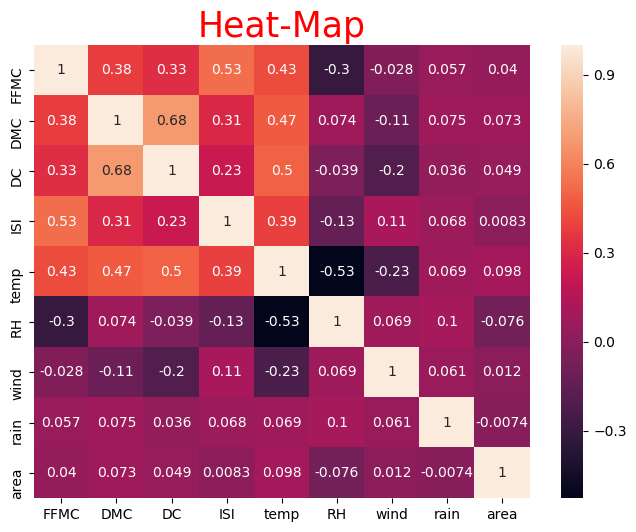

In [24]:
plt.figure(figsize=(8,6),dpi=100)
sns.heatmap(df.iloc[:,2:11].corr(),annot=True)
plt.ylim(9,0)
plt.title("Heat-Map",fontsize=25,color='red');

### Lets plot few highly correlated features 

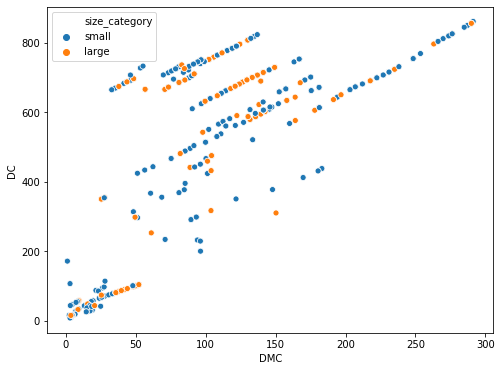

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='DMC',y='DC',data=df,hue='size_category');

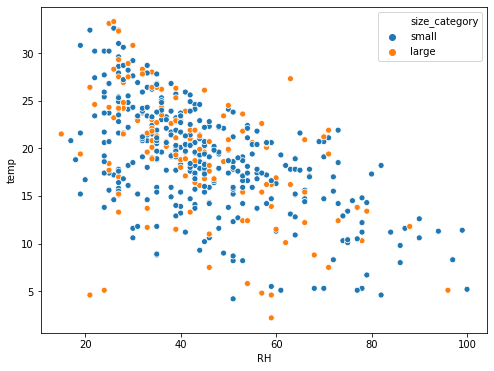

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='RH',y='temp',data=df,hue='size_category')

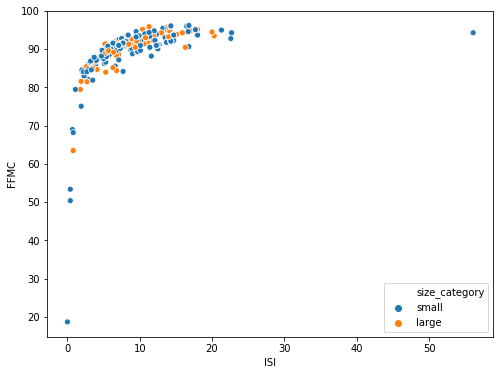

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='ISI',y='FFMC',data=df,hue='size_category')

In [33]:
df = pd.get_dummies(df.drop(['month','day'],axis=1),drop_first=True)

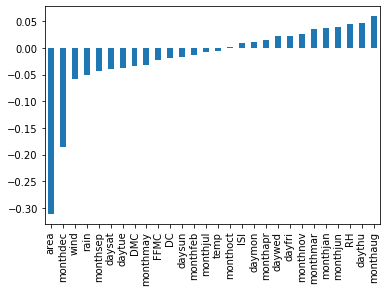

In [37]:
df.corr()['size_category_small'][:-1].sort_values().plot(kind='bar');


### preparing data for model building

In [39]:
X = df.drop(['size_category_small'],axis=1).values
y = df['size_category_small'].values

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
scaler.fit(X_train)

MinMaxScaler()

In [45]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating Model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [47]:
X_train.shape

(387, 28)

In [83]:
model = Sequential()
model.add(Dense(units=28,activation='relu'))
model.add(Dense(units=14,activation='relu'))
model.add(Dense(units=7,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [84]:
model.fit(x=X_train, y=y_train, epochs=600,
          validation_data=(X_test, y_test), verbose=1)

Epoch 1/600
13/13 [==============================] - 1s 14ms/step - loss: 0.6776 - val_loss: 0.6647
Epoch 2/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6478 - val_loss: 0.6485
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6290 - val_loss: 0.6351
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6108 - val_loss: 0.6255
Epoch 5/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5944 - val_loss: 0.6172
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5793 - val_loss: 0.6151
Epoch 7/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5704 - val_loss: 0.6165
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5672 - val_loss: 0.6189
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5652 - val_loss: 0.6186
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5638 - val_loss: 0.6181
Epoch 11

13/13 [==============================] - 0s 4ms/step - loss: 0.4093 - val_loss: 0.5661
Epoch 84/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3978 - val_loss: 0.5503
Epoch 85/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3980 - val_loss: 0.5644
Epoch 86/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3995 - val_loss: 0.5611
Epoch 87/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3882 - val_loss: 0.5451
Epoch 88/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3843 - val_loss: 0.5699
Epoch 89/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3844 - val_loss: 0.5585
Epoch 90/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3874 - val_loss: 0.5809
Epoch 91/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4002 - val_loss: 0.5559
Epoch 92/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3797 - val_loss: 0.5676
Epoch 93/600


13/13 [==============================] - 0s 4ms/step - loss: 0.2056 - val_loss: 0.5467
Epoch 165/600
13/13 [==============================] - 0s 4ms/step - loss: 0.2025 - val_loss: 0.5245
Epoch 166/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1967 - val_loss: 0.5377
Epoch 167/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1940 - val_loss: 0.5404
Epoch 168/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1917 - val_loss: 0.5300
Epoch 169/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1937 - val_loss: 0.5380
Epoch 170/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1869 - val_loss: 0.5660
Epoch 171/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1845 - val_loss: 0.5293
Epoch 172/600
13/13 [==============================] - 0s 4ms/step - loss: 0.2027 - val_loss: 0.5437
Epoch 173/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1812 - val_loss: 0.5186
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.0940 - val_loss: 0.5790
Epoch 246/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0877 - val_loss: 0.5876
Epoch 247/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0811 - val_loss: 0.6054
Epoch 248/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0798 - val_loss: 0.5907
Epoch 249/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0814 - val_loss: 0.5844
Epoch 250/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0779 - val_loss: 0.6009
Epoch 251/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0785 - val_loss: 0.5975
Epoch 252/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0789 - val_loss: 0.6062
Epoch 253/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0783 - val_loss: 0.5955
Epoch 254/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0807 - val_loss: 0.5895
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.0747 - val_loss: 0.6739
Epoch 327/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0715 - val_loss: 0.6986
Epoch 328/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0560 - val_loss: 0.6400
Epoch 329/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0410 - val_loss: 0.6337
Epoch 330/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0421 - val_loss: 0.6469
Epoch 331/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0399 - val_loss: 0.6436
Epoch 332/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0440 - val_loss: 0.6441
Epoch 333/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0453 - val_loss: 0.6174
Epoch 334/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0560 - val_loss: 0.6037
Epoch 335/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0729 - val_loss: 0.7000
Epoc

13/13 [==============================] - 0s 5ms/step - loss: 0.0262 - val_loss: 0.6490
Epoch 408/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0243 - val_loss: 0.6713
Epoch 409/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0260 - val_loss: 0.6533
Epoch 410/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0264 - val_loss: 0.6532
Epoch 411/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0246 - val_loss: 0.6674
Epoch 412/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0283 - val_loss: 0.6326
Epoch 413/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0337 - val_loss: 0.7214
Epoch 414/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0402 - val_loss: 0.6672
Epoch 415/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0297 - val_loss: 0.6431
Epoch 416/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0275 - val_loss: 0.6925
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.0204 - val_loss: 0.6852
Epoch 489/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0191 - val_loss: 0.7059
Epoch 490/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0167 - val_loss: 0.6712
Epoch 491/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0520 - val_loss: 0.8850
Epoch 492/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0435 - val_loss: 0.6431
Epoch 493/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0347 - val_loss: 0.6526
Epoch 494/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0292 - val_loss: 0.7108
Epoch 495/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0212 - val_loss: 0.7032
Epoch 496/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0238 - val_loss: 0.6366
Epoch 497/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0283 - val_loss: 0.6430
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.7216
Epoch 570/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.7525
Epoch 571/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0333 - val_loss: 0.7193
Epoch 572/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.7000
Epoch 573/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0134 - val_loss: 0.7348
Epoch 574/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0125 - val_loss: 0.7479
Epoch 575/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.6991
Epoch 576/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0139 - val_loss: 0.7547
Epoch 577/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0310 - val_loss: 0.8386
Epoch 578/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0289 - val_loss: 0.6859
Epoc

### Lets Evaluate the model performance

In [85]:
predictions = model.predict_classes(X_test)

C:\Users\ABHAY\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [86]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [87]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        39
           1       0.88      0.97      0.92        91

    accuracy                           0.88       130
   macro avg       0.89      0.83      0.85       130
weighted avg       0.89      0.88      0.88       130



In [91]:
print(confusion_matrix(y_test,predictions))

[[27 12]
 [ 3 88]]


In [94]:
cm = np.array(confusion_matrix(y_test,predictions))

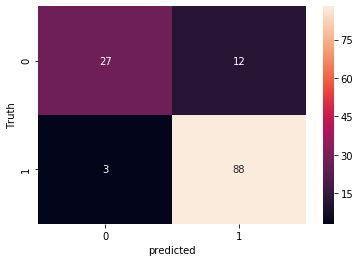

In [98]:
sns.heatmap(cm,annot=True)
plt.ylim(2,0)
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()